## MODÜLLERİN İMPORT EDİLMESİ

In [1]:
from TSCMaterialModels import Mander
from TSCConfimentBarsRules import ConfimentDesign as cd
from Definitions import DuctilityLevel, ResSystemType, SlabSystem,SeismicResistanceBuildingsClass
from TSCResponseSpectra import *

## KULLANILACAK DEĞERLER

In [2]:
"""Units N,mm"""
Nd                      = 16000 
B                       = 400
H                       = 400
s                       = 80
TieRebarDiameter        = 8
LongnitRebarDiameter    = 14
ClearCoverConc          = 25
NumBarsTop              = 2
NumBarsInterior         = 1
NumBarsBot              = 2
X_tiebars               = 2
Y_tiebars               = 3
fsy                     = 220
fywe                    = 220
eps_su                  = 0.08
f_co                    = 25
f_ce                    = 25
Fctd                    = 10
Ln                      = 2600

## TBDY2018 DİKDÖRTGEN KOLON SARGI DONATISI TASARIMI

In [3]:
ConfinmentDesign = cd(Nd, fsy, Fctd, Ln, B, H, ClearCoverConc, X_tiebars, Y_tiebars, f_co, fywe, TieRebarDiameter, LongnitRebarDiameter)
ConfinmentDesign

ConfimentDesign(Nd=16000, Fsy=220, Fctd=10, Ln=2600, Width=400, Height=400, Cover=25, Xkol=2, Ykol=3, Fck=25, Fywk=220, ConfimentRebarDiameter=8, LongnitudeRebarDiameter=14)

In [4]:
ConfinmentDesign.Set_Variables()

Kolon Serbest Bölgesindeki Etriye Adeti - Etriye Çapi / SarılmaDışıAralık / OrtaSarılmadakiAralık / UçSarılmaAralık = 42 - ∅8 / 16 / 5 / 5


In [5]:
s = ConfinmentDesign.s_OptEndConfArea
s

52

## TBDY2018 MALZEME MODELLERİ (EK-5A)

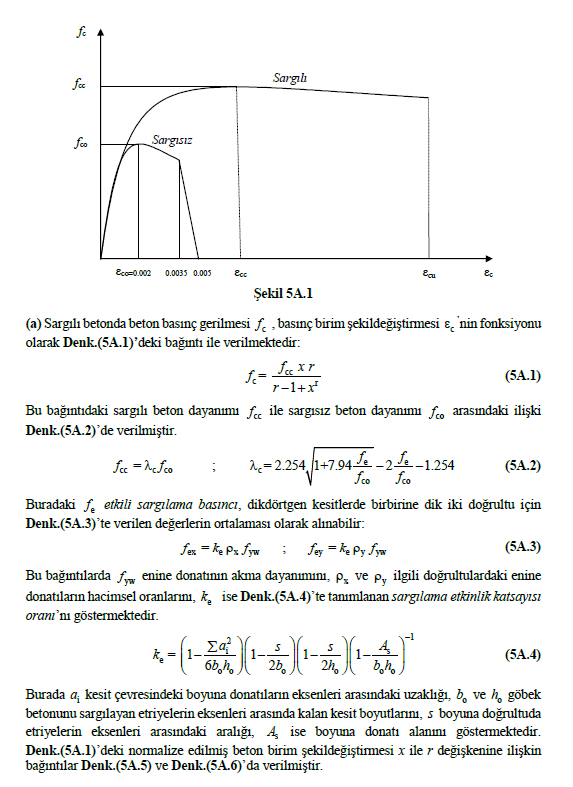    

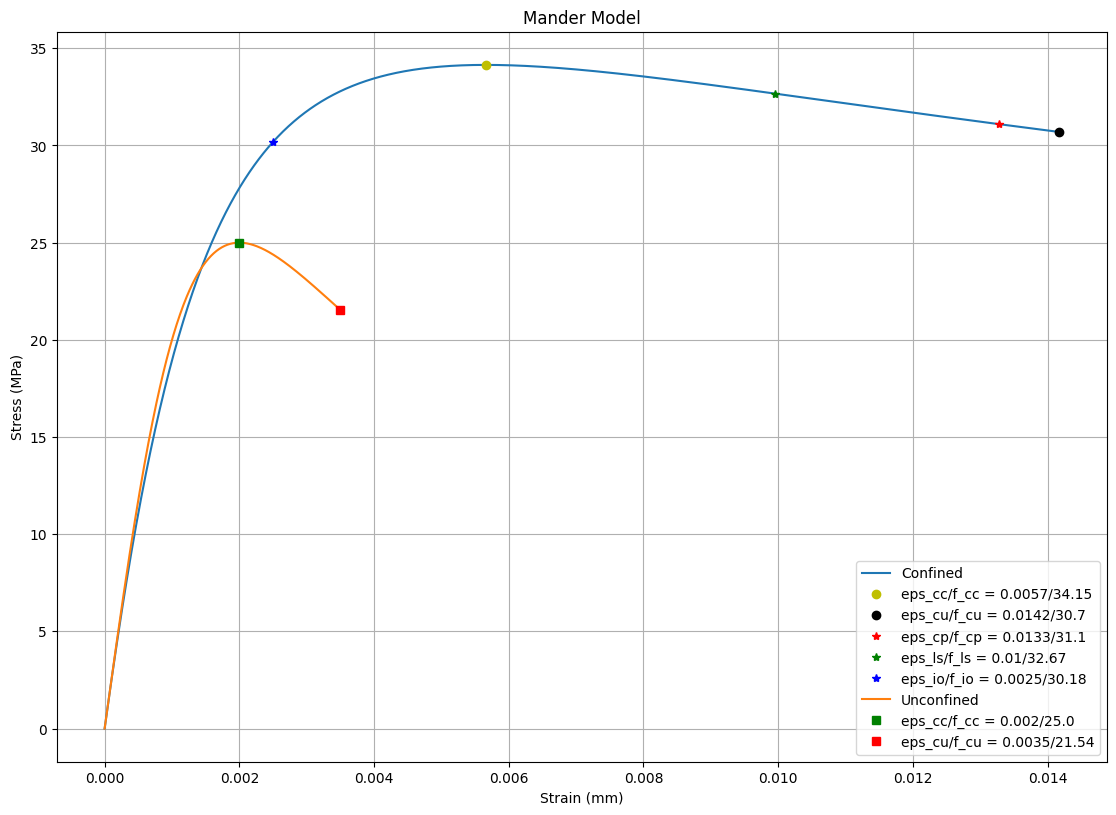

In [6]:
mander = Mander(B                    = B,
                H                    = H,
                s                    = s,
                TieRebarDiameter     = TieRebarDiameter,
                LongnitRebarDiameter = LongnitRebarDiameter,
                ClearCoverConc       = ClearCoverConc,
                NumBarsTop           = NumBarsTop,
                NumBarsInterior      = NumBarsInterior,
                NumBarsBot           = NumBarsBot,
                X_tiebars            = X_tiebars,
                Y_tiebars            = Y_tiebars,
                fsy                  = fsy,
                f_ywe                = fywe,
                eps_su               = eps_su,
                f_co                 = f_co,
                f_ce                 = f_ce
                )

mander.Plot_Manders()

## TBDY2018 HEDEF SPEKTRUMLARIN ELDE EDİLMESİ

Sismik verilerin girişi için `SeismicInputs` örnek sınıfımızın instance'nı alıyoruz. Bu sınıf diğer sınıflarda girdi olarak kullanılabilir.

In [7]:
SeismicVariables = SeismicInputs(lat = 39.85,lon = 30.2,soil = "ZC",intensity = "DD2")
SeismicVariables

Latitude :39.85
Longitude :30.2
Soil Class :ZC
Intensity:DD2

Bina modeli ile ilgili bilgileri `SeismicResistanceBuildingInputs` sınıfında veriyoruz. Burada sınıflandırmalar için `Enum` sınıfları olan `DuctilityLevel`,`ResSystemType`,`SlabSystem` kullandık.

In [8]:
RCBuilding = SeismicResistanceBuildingInputs(Hn=70,
                                                 I=1,
                                                 DuctilLevel=DuctilityLevel.Yuksek,
                                                 ResSystemType_X=ResSystemType.BAKarma,
                                                 ResSystemType_Y=ResSystemType.BAKarma,
                                                 SlabSystem=SlabSystem.Plak_kirisli)
RCBuilding

Hn :70
I :1
DuctilLevel :Yuksek
ResSystemType_X :BAKarma
ResSystemType_Y :BAKarma
SlabSystem :Plak_kirisli

Spektrum değerlerinin bulunması için `SeismicInputsManager` sınıfı kullanılıyor. Bu sınıf `SeismicVariables` sınıfının bilgilerini girdi olarak kullanır ve diğer değerleri `SetVariables` fonksiyonu çalıştırılırsa hesaplayıp sınıf property lerine set eder.

In [9]:
SIM = SeismicInputsManager(SeismicVariables=SeismicVariables, TL=6.0)
SIM.SetVariables()
SIM

Ss :0.737
S1 :0.195
PGA :0.309
PGV :18.833
Fs :1.205
F1 :1.5
SDs :0.888085
SD1 :0.2925
TA :0.06587207305607008
TB :0.3293603652803504
TL :6.0

`SeismicResistanceBuildingManeger` sınıfı bina bilgilerini içeren `SeismicResistanceBuildingInputs` ve sismik verilerin hesabını yapan `SeismicInputsManager` sınıflarını girdi olarak alır ve genel bina sınıflandırma işlemlerini `SetVariables` fonksiyonu çalıştırılarak hesaplar ve propertylere set eder.

In [10]:
Srbm = SeismicResistanceBuildingManeger(BuildingVariables=RCBuilding, SeismicManager=SIM, BuildingClass=SeismicResistanceBuildingsClass.A14, Rx=6,Ry=3)
Srbm.SetVariables()
Srbm

SeismicResistanceBuildingManeger(BuildingVariables=Hn :70
I :1
DuctilLevel :Yuksek
ResSystemType_X :BAKarma
ResSystemType_Y :BAKarma
SlabSystem :Plak_kirisli, SeismicManager=Ss :0.737
S1 :0.195
PGA :0.309
PGV :18.833
Fs :1.205
F1 :1.5
SDs :0.888085
SD1 :0.2925
TA :0.06587207305607008
TB :0.3293603652803504
TL :6.0, BuildingClass=<SeismicResistanceBuildingsClass.A14: 5>, Total_M_DEV=0, Total_M_o=0, DTS=2, BYS=2, Rx=6, Ry=3, Dx=1.0, Dy=1.0)

`Spectrum` sınıfı `SeismicResistanceBuildingManeger` sınıfı kullanarak yapıya ait spektrum bilgilerini `SetVariables` fonksiyonu çalıştırılarak hesaplayıp `ElasticSpectrums` değişkenine set eder. Bu property `pandas.DataFrame` döndürür.

In [11]:
Spec = Spectrum(BuildingManager=Srbm)
Spec.SetVariables()
Spec

Spectrum(BuildingManager=SeismicResistanceBuildingManeger(BuildingVariables=Hn :70
I :1
DuctilLevel :Yuksek
ResSystemType_X :BAKarma
ResSystemType_Y :BAKarma
SlabSystem :Plak_kirisli, SeismicManager=Ss :0.737
S1 :0.195
PGA :0.309
PGV :18.833
Fs :1.205
F1 :1.5
SDs :0.888085
SD1 :0.2925
TA :0.06587207305607008
TB :0.3293603652803504
TL :6.0, BuildingClass=<SeismicResistanceBuildingsClass.A14: 5>, Total_M_DEV=0, Total_M_o=0, DTS=2, BYS=2, Rx=6, Ry=3, Dx=1.0, Dy=1.0))

In [12]:
Spec.ElasticSpectrums.head(20)

,T,Sae,Sde,Sve,RaT_x,SaR_x,RaT_y,SaR_y
0,0.000,0.3552,0.000000,0.284187,1.000000,0.355200,1.000000,0.355200
1,0.005,0.3957,0.000239,0.381257,1.075905,0.367784,1.030362,0.384040
2,0.010,0.4361,0.001055,0.478327,1.151809,0.378622,1.060724,0.411134
3,0.015,0.4766,0.002593,0.575398,1.227714,0.388201,1.091086,0.436813
4,0.020,0.5170,0.005001,0.672468,1.303619,0.396588,1.121448,0.461011
5,0.025,0.5575,0.008425,0.710468,1.379524,0.404125,1.151809,0.484021
6,0.030,0.5979,0.013012,0.710468,1.455428,0.410807,1.182171,0.505764
7,0.035,0.6384,0.018910,0.710468,1.531333,0.416892,1.212533,0.526501
8,0.040,0.6788,0.026262,0.710468,1.607238,0.422340,1.242895,0.546144
9,0.045,0.7192,0.035216,0.710468,1.683142,0.427296,1.273257,0.564851


Bütün grafiklerin tek seferde gösterimi için `plot_Spectrums` fonksiyonu çalıştırılabilir. Özel olarak hazırlanmış formatta grafikler tek parçada çizdirilir.

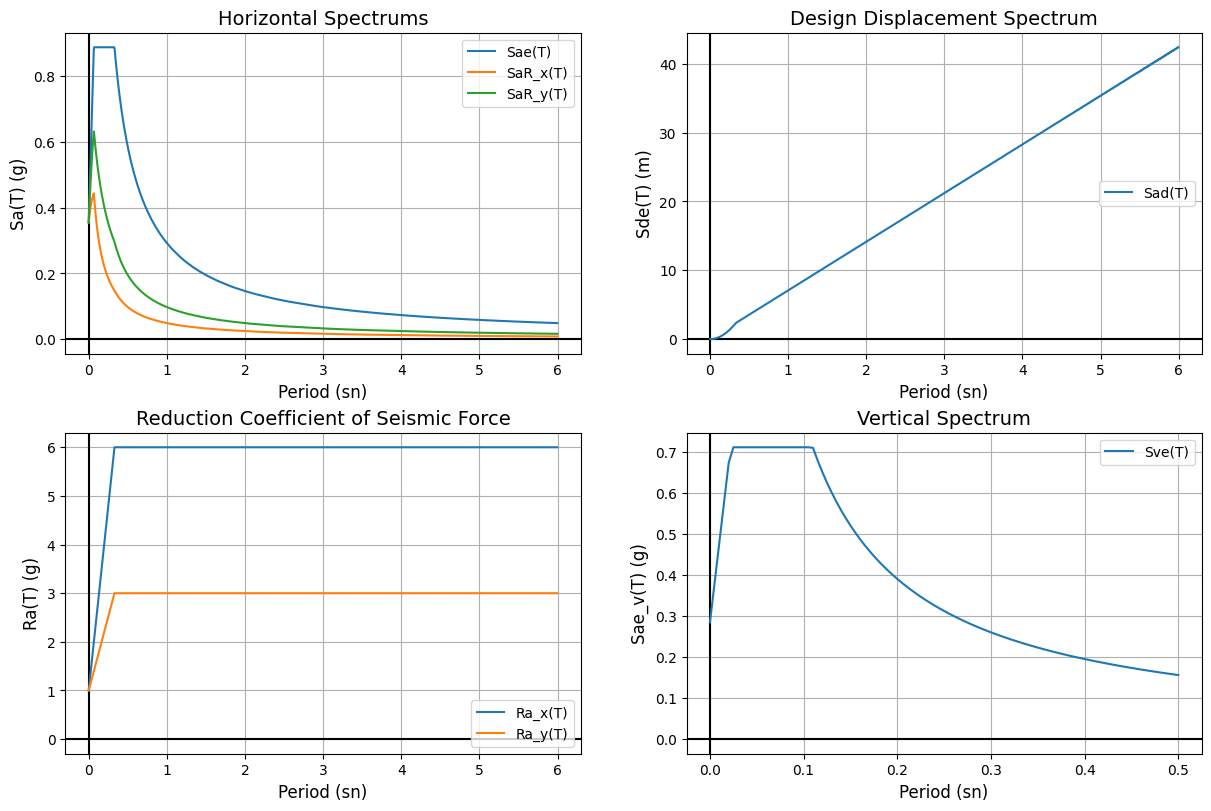

In [13]:
Spec.plot_Spectrums()

İlgili sınıflardaki fonksiyonlar tek tekte kullanılabilir. Örneğin belirli bir periyot için elastik ve azaltılmış elastik spektrum değerleri aşağıdaki fonksiyonlar yardımıyla elde edilebilir.

In [14]:
Sae_Tp = Spec.Get_Sae_Tp(T=1.2,
                         TA = Spec.BuildingManager.SeismicManager.TA,
                         TB = Spec.BuildingManager.SeismicManager.TB,
                         SDs= Spec.BuildingManager.SeismicManager.SDs,
                         SD1= Spec.BuildingManager.SeismicManager.SD1,
                         TL = Spec.BuildingManager.SeismicManager.TL 
                         )
Sae_Tp

0.2438

In [15]:
Sar_Tp = Spec.Get_SaR_Tp(R  = Spec.BuildingManager.Rx,
                         D  = Spec.BuildingManager.Dx,
                         T  = 1.2,
                         TB = Spec.BuildingManager.SeismicManager.TB,
                         I  = Spec.BuildingManager.BuildingVariables.I,
                         TA = Spec.BuildingManager.SeismicManager.TA,
                         SDs= Spec.BuildingManager.SeismicManager.SDs,
                         SD1= Spec.BuildingManager.SeismicManager.SD1,
                         TL = Spec.BuildingManager.SeismicManager.TL  )
Sar_Tp

0.0406